# Notebook to analyze output of Grid code for SU(4)
## Gather Plaquette, polyakov loop and Acceptance 
Author: Venkitesh Ayyar (vayyar@bu.edu) \
March 27, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import subprocess as sp
import os 
import glob
import pandas as pd

In [3]:
# %matplotlib widget

In [4]:
%matplotlib notebook

In [92]:
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov16/dm_tests/run1/SDM.4node'
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov30/dm_tests/run_dwf/SDM.4node'

# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node'
fname='/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run4_lower_traj_step/SDM.4node'
# fname='/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run5_lower_beta/SDM.4node'
# fname='/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run6_higher_beta/SDM.4node'
# fname='/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run7_lower_mf/SDM.4node'
# fname='/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run8_higher_mf/SDM.4node'


### Get Plaquette value

In [93]:
cmd="grep 'Plaq' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
# print(op[0])

arr1=np.array([[int(i.split('[ ')[-1].split(' ]')[0]), 
  np.float64(i.split(' ')[-1]),
  np.float64(i.split(': ')[2].split(' s')[0])] 
 for i in op])

grep 'Plaq' /usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run4_lower_traj_step/SDM.4node


In [94]:
cmd="grep 'Polyakov' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
# print(op[0])

arr2=np.array([complex(np.float64(i.split(' ')[-1][1:-1].split(',')[0]),
         np.float64(i.split(' ')[-1][1:-1].split(',')[1])) 
 for i in op ])

grep 'Polyakov' /usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run4_lower_traj_step/SDM.4node


In [95]:
cmd="grep 'Total time for trajectory' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
# print(op[0])

arr3=[np.float32(i.split(': ')[-1]) for i in op]

grep 'Total time for trajectory' /usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run4_lower_traj_step/SDM.4node


In [96]:
lgth=min(len(arr1),len(arr2),len(arr3))
print(lgth)

420


In [97]:
cmd="grep 'Metropolis_test' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
# print(op[0])

arr_temp=[1 if (i.split(' ')[-1]=='ACCEPTED') else 0 for i in op] # Accept =1 , Reject = 0
skip=lgth-len(arr_temp)
print("skip",skip)
arr_skip=[np.nan for i in range(skip)]
arr4=np.array(arr_skip+arr_temp)


grep 'Metropolis_test' /usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run4_lower_traj_step/SDM.4node
skip 20


In [98]:
cols=['iter','Plaquette','Polyakov','Traj_time','Accept','Plaq_epoch']
df=pd.DataFrame(columns=cols)

df['Plaquette']=arr1[:,1]
df['Plaq_epoch']=arr1[:,2]
df['iter']=arr1[:,0].astype(int)
df['Polyakov']=arr2
df['Traj_time']=arr3
df['Accept']=arr4


In [99]:
df

,iter,Plaquette,Polyakov,Traj_time,Accept,Plaq_epoch
0,1,0.689526,0.217032-0.001599j,14.3067,NaN,22.760001
1,2,0.658609,0.153629+0.003100j,14.1233,NaN,36.901026
2,3,0.636826,0.114256+0.001041j,14.1670,NaN,51.855020
3,4,0.620348,0.091238+0.005113j,14.1867,NaN,65.289702
4,5,0.608998,0.086566+0.000789j,14.2183,NaN,79.525567
...,...,...,...,...,...,...
415,206,0.578785,0.033053-0.000101j,14.1182,1.0,2930.893524
416,207,0.578484,0.034656-0.004332j,14.1247,1.0,2945.355700
417,208,0.577961,0.031393+0.000962j,14.1430,1.0,2959.195973
418,209,0.578500,0.031704-0.001733j,14.1735,1.0,2973.386938


## Plot Plaquette

<IPython.core.display.Javascript object>


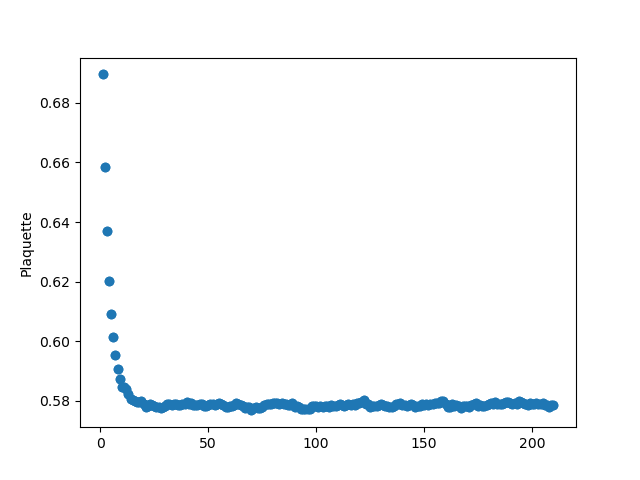

In [100]:
plt.figure()
x=df.iter.values
y=df.Plaquette.values
# y=df.Traj_time.values

plt.plot(x,y,marker='o',linestyle='')
plt.ylabel('Plaquette')
plt.show()

### Plot Polyakov loop

<IPython.core.display.Javascript object>


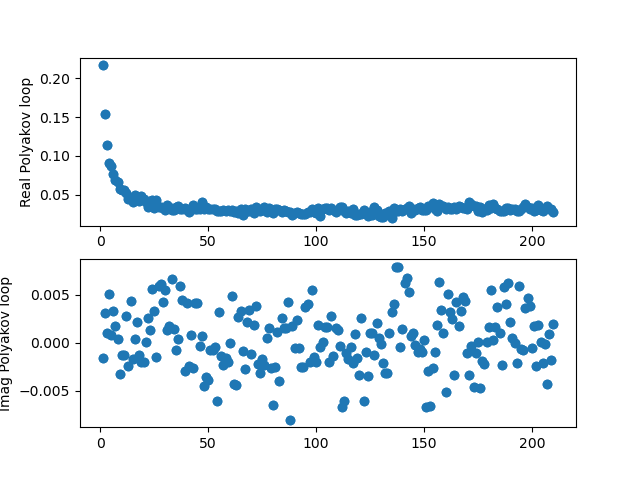

In [101]:
fig=plt.figure()
x=df.iter.values
y=df.Polyakov.values
fig.add_subplot(2,1,1)

plt.plot(x,y.real,marker='o',linestyle='')
plt.ylabel('Real Polyakov loop')

fig.add_subplot(2,1,2)

plt.plot(x,y.imag,marker='o',linestyle='')
plt.ylabel('Imag Polyakov loop')
plt.show()


<IPython.core.display.Javascript object>


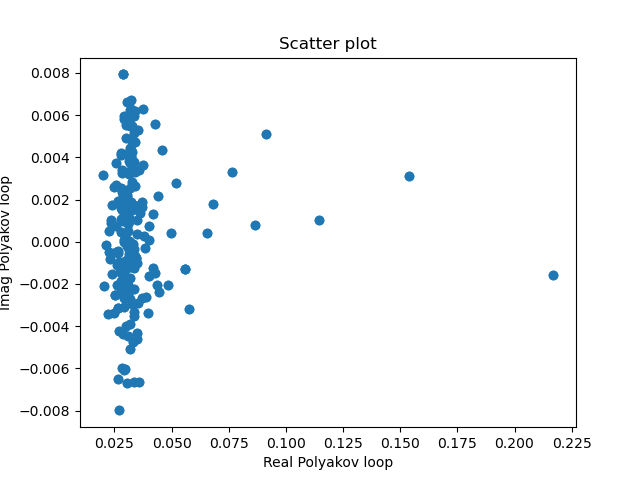

In [103]:
fig=plt.figure()
x=df.iter.values
y=df.Polyakov.values

y1=y.real
y2=y.imag

plt.scatter(y1,y2)
plt.xlabel('Real Polyakov loop')
plt.ylabel('Imag Polyakov loop')
plt.title("Scatter plot")
plt.show()

### Plot acceptance

<IPython.core.display.Javascript object>


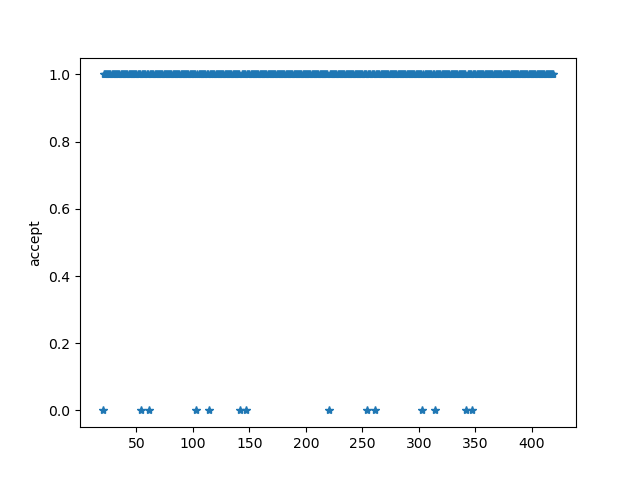

In [104]:
plt.figure()
x=df.iter.values
y=df.Accept.values
plt.ylabel('accept')
plt.plot(y,marker='*',linestyle='')
plt.show()

In [105]:
# Print Acceptance ratio
ct=df['Accept'].dropna().value_counts()
print(ct)

if len(ct)<2:
    print("Only one type",ct)
    pass 
elif len(ct)==2:     
    Act=ct[1]
    Rft=ct[0]
    print(Act* 100 /(Act+Rft),'%')

1.0    386
0.0     14
Name: Accept, dtype: int64
96.5 %
